# Kapitel 1

## Introduktion till statistisk analys

In [17]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
from scipy.stats import f
    
Customers, Major, Gig = None, None, None
with pd.ExcelFile("Kap1.xlsx") as reader:
        Customers=pd.read_excel(reader, sheet_name='Customers')
        Major=pd.read_excel(reader, sheet_name='Major')
        Gig=pd.read_excel(reader, sheet_name='Gig')

In [18]:
Major.head()

,Student,Major
0,1,Accounting
1,2,Management
2,3,Economics
3,4,Finance
4,5,History


In [19]:
Gig = Gig.iloc[:, 0:4]

Gig.head()

,EmployeeID,Wage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant


<h1>Lägesmått eller mått på centraltendens</h1>

<h3>Typvärdet för en datamängd är det vanligast förekommande värdet i datamängden</h3>

Exempel: Vad är typvärdet för datamängden {Röd, Röd, Gul, Grön}?

Vad är typvärdet av utbildningar i datamängden 'Major'?

In [8]:
Major['Major'].mode()

0    Management
dtype: object

In [9]:
Major['Major'].value_counts()

Management    5
Accounting    4
Economics     4
Finance       4
History       4
Undecided     3
Statistics    3
Psychology    3
Name: Major, dtype: int64

<h3>Medianen för en datamängd är det värde som hamnar "i mitten" om värdena ordnas efter storlek</h3>

Exempel: Vad är medianen för datamängden {8, 3, 6, 7, 9}?

Lösning: I storleksordning: 3,6,7,8,9 så medianen är 7

Exempel: Vad är medianen för datamängden {8, 3, 7, 9}?

Lösning: I storleksordning: 3,7,8,9 så medianen är medelvärdet av 7 och 8, alltså 7.5

Vad är medianen av timlön (Wage) i datamängden 'Gig'?

Direkt på "framen" med Pandas:

In [10]:
Gig['Wage'].median()

41.88

<h3>Med numpy:</h3>

In [11]:
np.median(Gig['Wage'])

41.88

Medelvärdet för en datamängd är "snittet", alltså summan av alla värden dividerat med hur många värden som finns i datamängden

$${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$$
    

Exempel: Vad är medelvärdet för datamängden {8, 3, 6, 7, 9}?

Lösning:

$$\frac{8+3+6+7+9}{5}=\frac{33}{5}=6.6$$

Vad är medelvärdet av timlön (Wage) i datamängden 'Gig'?

Direkt på \"framen\" med Pandas:

In [14]:
Gig['Wage'].mean()

40.08

In [15]:
Gig['Wage'].mean().round(2)

40.08

<h3>Med numpy:</h3>

In [13]:
np.mean(Gig['Wage'])

40.08279801324504

<h3>Reflektion: Kan man räkna typvärden, medianer och medelvärden för alla datatyper?</h3>

<h1>Spridningsmått</h1>

Variansen för ett stickprov ges av:

$$s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(x_i-{\bar x}\right)^2=\frac{1}{n-1}\left(\sum_{i=1}^{n}x_i^2-n\left({\bar x}\right)^2\right)$$


Exempel: Vad är variansen för stickprovet 8, 3, 7, 9 ?

Lösning: Medelvärdet är 6.75 så vi får att variansen är:
    
$$\frac{1}{4-1}\left(8^2+3^2+7^2+9^2-4\cdot 6.75^2\right)\approx 6.9$$
  

<h3>Reflektion: Vilken enhet får variansen om enheten på data är kronor?</h3>

<h3>Vad är stickprovsvariansen av timlön (Wage) i datamängden 'Gig'?</h3>

Direkt på "framen" med Pandas:

In [14]:
Gig['Wage'].var()

50.32101885797284

<h3>Med numpy:</h3>

In [16]:
np.var(Gig['Wage'],ddof=1)

50.32101885797284

<h3>Reflektion: Vad gör "ddof"?</h3>

Standardavvikelsen är roten ur variansen:

$$s=\sqrt{s^2}$$

<h3>Vad är stickprovsstandardavvikelsen av timlön (Wage) i datamängden 'Gig'?</h3>

<h3>Direkt på "framen" med Pandas:</h3>

In [17]:
Gig['Wage'].std()

7.093730954721418

<h3>Med numpy:</h3>

In [18]:
np.std(Gig['Wage'],ddof=1)

7.093730954721418

Medelabsolutavvikelsen för en datamängd ges av:

$$MAD=\frac{1}{n}\sum_{i=1}^{n}\lvert x_i - {\bar x}\rvert$$


Exempel: Vad är MAD för datamängden {8, 3, 7, 9}?

Lösning: Medelvärdet är 6.75 så vi får att MAD är:

$$\frac{1}{4}\left(\lvert 8 - 6.75 \rvert + \lvert 3 - 6.75 \rvert + \lvert 7 - 6.75 \rvert + \lvert 9 - 6.75 \rvert\right)=\frac{1.25+3.75+0.25+2.25}{4}\approx 1.9$$

<h3>Med Pandas:</h3>

In [19]:
pd.DataFrame([8, 3, 7, 9]).mad()

0    1.875
dtype: float64

<h1>En bra funktion i Pandas</h1>

Kan man få fram mer än ett deskriptivt mått från en "frame", t ex för "Wage" i "Gig"?

In [20]:
Gig['Wage'].describe()

count    604.000000
mean      40.082798
std        7.093731
min       24.280000
25%       34.190000
50%       41.880000
75%       45.865000
max       51.000000
Name: Wage, dtype: float64

<h3>Reflektion: "50%" är medianen</h3>

<h1>Medelvärde, median och skevhet</h1>

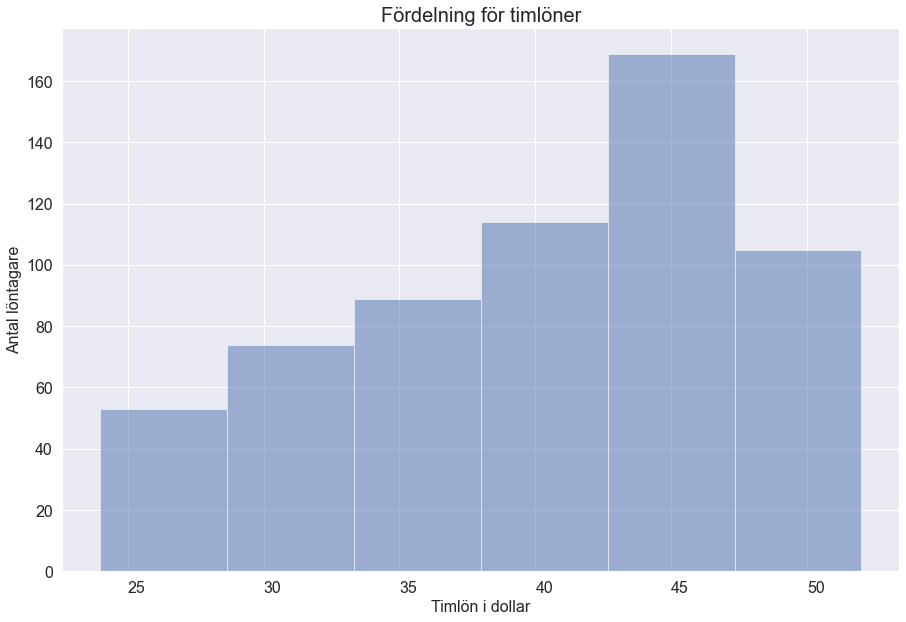

In [22]:
import seaborn as sns 
sns.set_theme() 
    
bins = np.linspace(24, 52, 7) 
    
plt.rcParams["figure.figsize"] = (15,10) 
plt.hist(Gig['Wage'], bins, 
             density=False, 
             histtype='bar' ,
             facecolor='b' ,
             alpha=0.5) 
    
    
plt.title("Fördelning för timlöner",fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.xlabel('Timlön i dollar',fontsize=16) 
plt.ylabel('Antal löntagare',fontsize=16) 
plt.xticks(fontsize=16,ha="left") 
plt.yticks(fontsize=16) 
plt.show()

Fördelningen är skev åt vänster, alltså vänstersvanden är tyngra än högersvansner, eller medelvärdet är mindre än medianen


Man kan mäta skevheten med

$$sum_{i=1}^{n}\left(\frac{x_i-{\bar x}}{s}\right)^3$$

Talet blir negativt om fördelningen är skev åt vänster och positivt om fördelningen är skev åt höger

<h3>Med Pandas:</h3>

In [29]:
Gig['Wage'].skew()

-0.5587007332243544

<h3>Med Scipy Stats:</h3>

In [30]:
scs.skew(Gig['Wage'])

-0.5573122731308094

<h3>Hmmmm???</h3>

In [31]:
scs.skew(Gig['Wage'],bias=False)

-0.5587007332243545

<h1>Klasser och stapeldiagram</h1>

Vi kanske vill göra ett stapeldiagram av 'Job' i 'Gig'. Hur kan man göra det i Python?

In [35]:
Gig.head()

,EmployeeID,Wage,Industry,Job
0,1,32.81,Construction,Analyst
1,2,46.00,Automotive,Engineer
2,3,43.13,Construction,Sales Rep
3,4,48.09,Automotive,Other
4,5,43.62,Automotive,Accountant


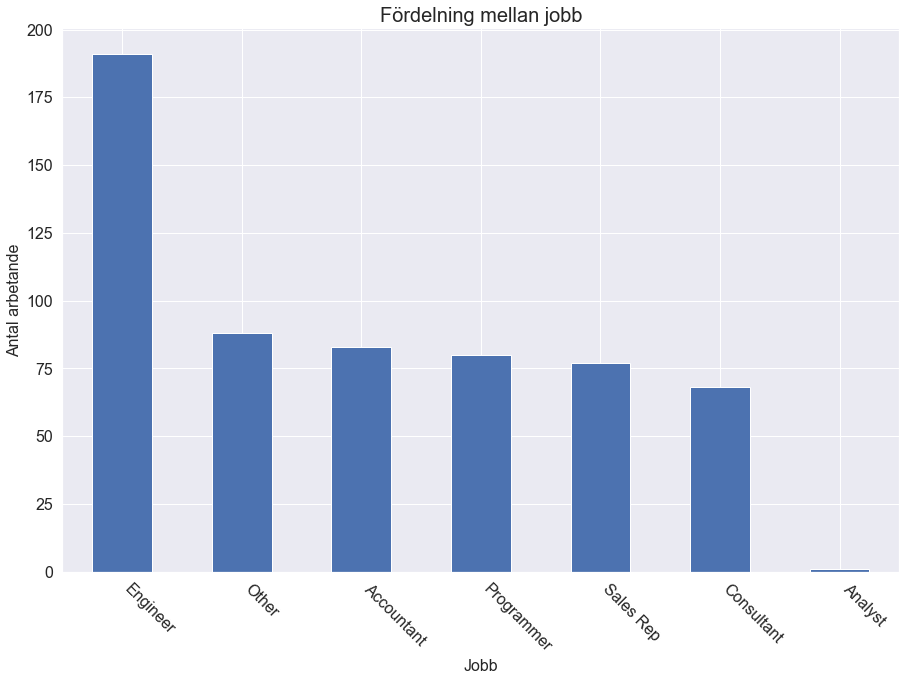

In [45]:
Gig['Job'].value_counts().plot(kind='bar', x='Job')
plt.title("Fördelning mellan jobb",fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.xlabel('Jobb',fontsize=16) 
plt.ylabel('Antal arbetande',fontsize=16) 
#plt.xticks(fontsize=16,ha="left") 
plt.xticks(fontsize=16,rotation=-45,ha="left")
plt.yticks(fontsize=16) 
plt.show()

Om man vill gruppera på industrisektorer då? En lösning är att göra en korstabell med Pandas och sedan plotta den

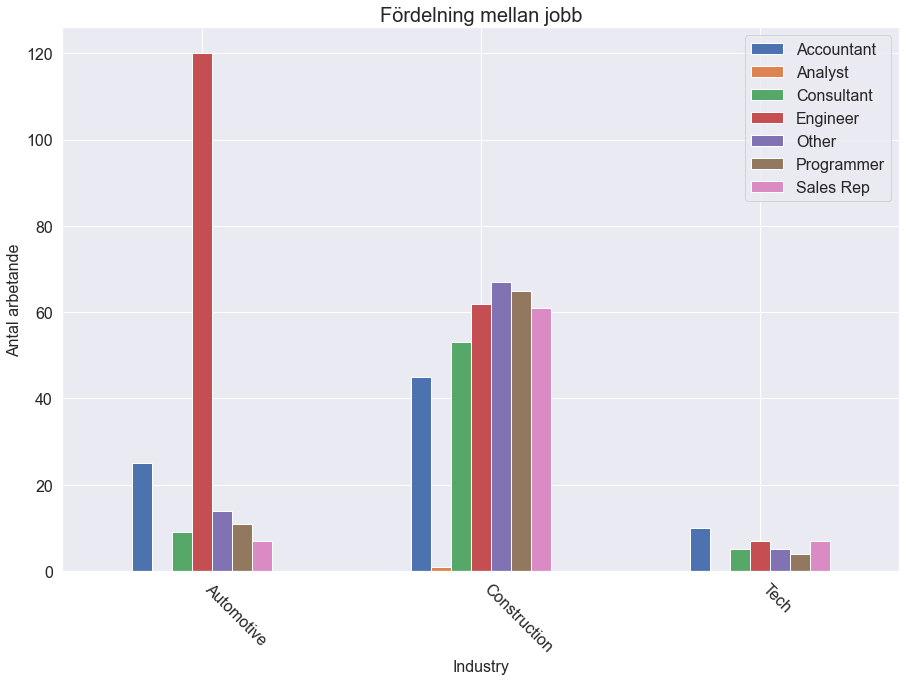

In [23]:
#pd.crosstab(Gig['Industry'],Gig['Job']).plot(kind='bar',stacked=True)

pd.crosstab(Gig['Industry'],Gig['Job']).plot(kind='bar',stacked=False)


plt.title("Fördelning mellan jobb",fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.xlabel('Industry',fontsize=16) 
plt.ylabel('Antal arbetande',fontsize=16) 
#plt.xticks(fontsize=16,ha="left") 
plt.xticks(fontsize=16,rotation=-45,ha="left")
plt.yticks(fontsize=16) 
plt.legend(fontsize=16) 
plt.show()

In [54]:
pd.crosstab(Gig['Industry'],Gig['Job'])

Job,Accountant,Analyst,Consultant,Engineer,Other,Programmer,Sales Rep
Industry,,,,,,,
Automotive,25,0,9,120,14,11,7
Construction,45,1,53,62,67,65,61
Tech,10,0,5,7,5,4,7


<h1>Deskriptiv statistik för grupperade data</h1>

Antag att vi gjort en undersökning på 200 hushåll och fått reda på att antal medlemmar i hushållet fördelar sig som:

In [86]:
df=pd.DataFrame(Customers['HHSize'].value_counts().rename('Antal Hushåll'))



df.index=df.index.set_names(['Antal medlemmar'])

df

,Antal Hushåll
Antal medlemmar,
5,45
4,41
3,40
2,39
1,35


<h3>Vad är medelvärde, median och standardavvikelse för dessa (grupperade) data?</h3>

Vi tar det "lättaste" först, medianen. 
Det finns 200 observationer så medianen är 3 eftersom om vi skulle ordna data i storleksordning 
skulle talen på position 100 och 101 vara 3

Medelvärdet beräknar vi enligt
$${\bar x}=\frac{\sum_{i=1}^n f_i x_i}{\sum_{i=1}^n f_i}=\frac{45\cdot 5+41\cdot 4+40\cdot 3+39\cdot 2+35\cdot 1}{45+41+40+39+35}=3.11$$

För att få standardavvikelsen beräknar vi först variansen enligt</h3>
$$s^2=\frac{\sum_{i=1}^n f_i \left(x_i-{\bar x}\right)^2}{\sum_{i=1}^n f_i-1}=
\frac{\sum_{i=1}^n f_i x_i^2- \sum_{i=1}^n f_i\left({\bar x}\right)^2}{\sum_{i=1}^n f_i -1}
=\frac{45\cdot 5^2+41\cdot 4^2+40\cdot 3^2+39\cdot 2^2+35\cdot 1^2-200\cdot 3.11^2}{199}=2.00$$

Standardavvikelsen är alltså $$\sqrt{2.00}\approx 1.41$$